See `tensorflow` [documentation](https://www.tensorflow.org/tutorials/images/data_augmentation) on Augmentation

In [1]:
import tensorflow as tf
print( tf.__version__)

2.17.1


# Lets Get an Image Dataset

In [2]:
# Fetch an Image dataset from the ZTM course
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-12-29 22:36:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.184.207, 173.194.193.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.184.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2024-12-29 22:36:43 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
! ls

pizza_steak  pizza_steak.zip  sample_data


In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory('pizza_steak/train/',
                                          batch_size=32, # also default
                                          image_size=(256,256),
                                          shuffle=False,
                                          label_mode='binary',
                                          seed=42)


Found 1500 files belonging to 2 classes.


#Create Some Image Visualization Utilities

In [179]:
import matplotlib.pyplot as plt
import numpy as np
def ViewImageBatch( DataSet, BatchNum ):
  BatchSize = round(len(DataSet.file_paths)/len(DataSet))
  print (f'DataSet Contains {len(DataSet.file_paths)} images in a BatchSize of {BatchSize}')
  for image,label in DataSet.skip(BatchNum).take(1):
    plt.figure(figsize=(12,6))
    for Num in range(BatchSize):
      plt.subplot( BatchSize//8, 8, Num+1 )
      plt.imshow(image[Num,:,:,:].numpy().astype('uint8'))
      plt.axis('off')
      plt.title(f'{DataSet.class_names[int(label[0])]}')


DataSet Contains 1500 images in a BatchSize of 32


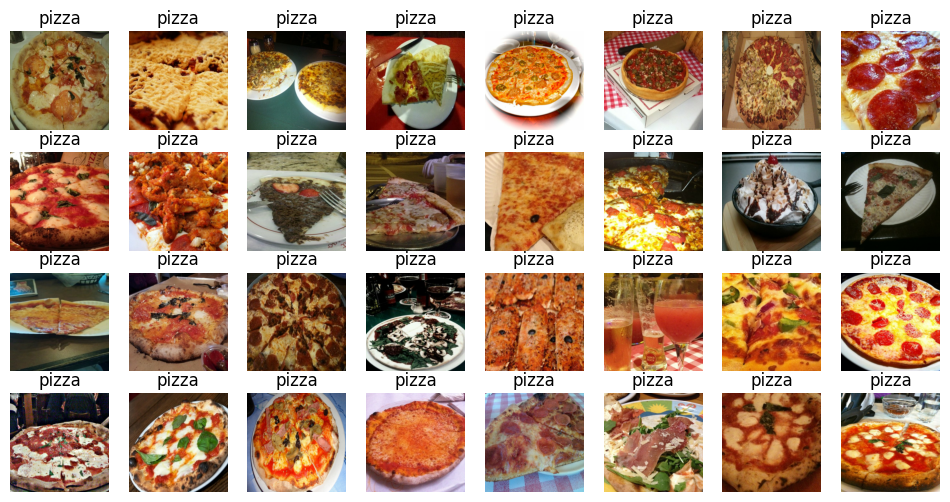

In [133]:
ViewImageBatch(train_data,0)

DataSet Contains 1500 images in a BatchSize of 32


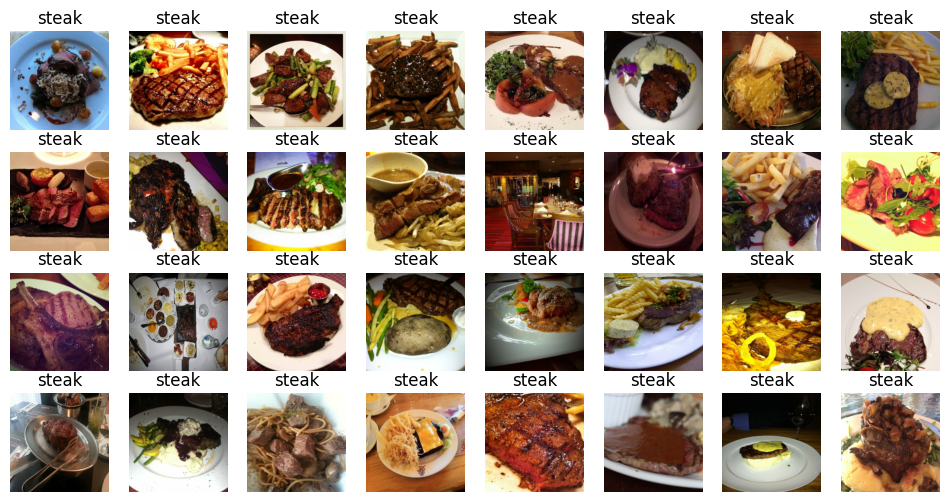

In [151]:
ViewImageBatch(train_data,30)

#Lets Experiment with Some Transforms

the transformations are layers that can just be put in the model pipleline. An alternate way is to create a seperate dataset using augmentation transforms

##Random Rotation

In [195]:
RandRot = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.RandomRotation(0.4),
])

#Example Rotational Transform
def RandRotateAugment( image, label ):
  AugImage = RandRot(image)
  return (AugImage, label)


In [199]:
rotated_train_data = train_data.map(RandRotateAugment)
type(rotated_train_data)


tensorflow.python.data.ops.map_op._MapDataset

In [200]:
# We can restore some of the missing attributes from converting
# from DataSet -> _MapDataSet
rotated_train_data.class_names = train_data.class_names
rotated_train_data.file_paths = train_data.file_paths

DataSet Contains 1500 images in a BatchSize of 32


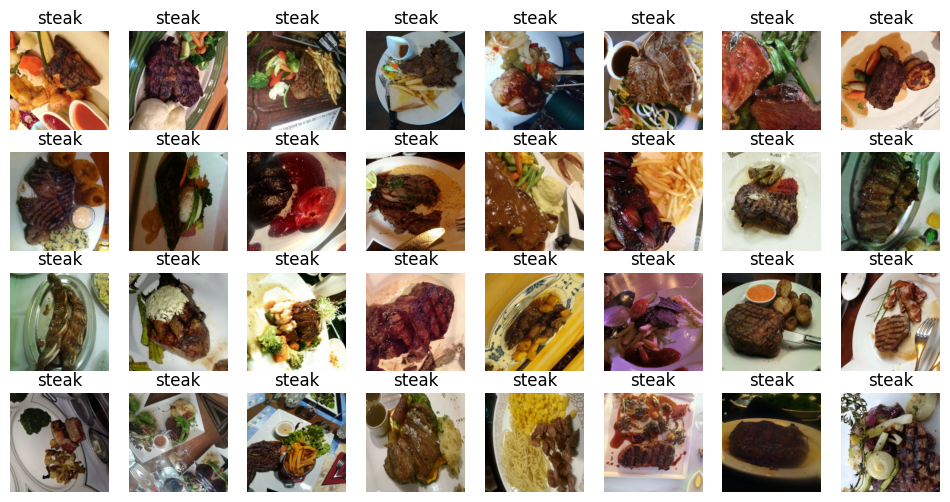

In [201]:
# View the Transformation
ViewImageBatch(rotated_train_data,40)

##Random Image Zoom

DataSet Contains 1500 images in a BatchSize of 32


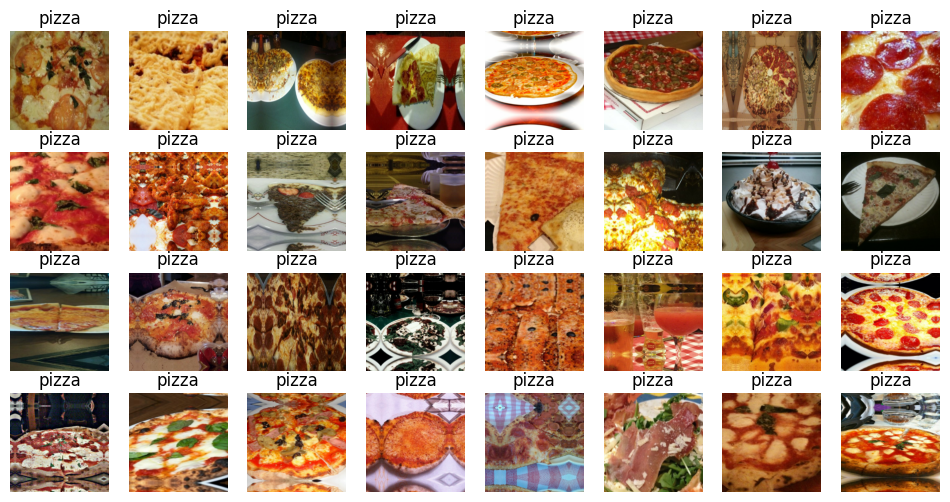

In [202]:
RandZoomLayers = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.RandomZoom(height_factor=0.5,width_factor=0.5),
])

#Example Rotational Transform
def RandZoomAugment( image, label ):
  AugImage = RandZoomLayers(image)
  return (AugImage, label)

zoom_train_data = train_data.map(RandZoomAugment)
zoom_train_data.class_names = train_data.class_names
zoom_train_data.file_paths = train_data.file_paths
ViewImageBatch(zoom_train_data, 0)

## Multiple Transforms In One Pass

DataSet Contains 1500 images in a BatchSize of 32


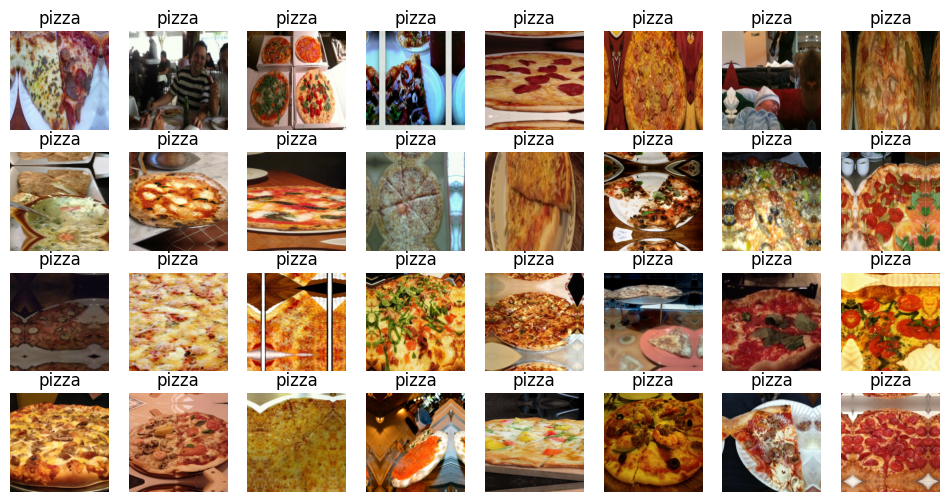

In [204]:
AugmentTransform = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.RandomZoom(height_factor=0.5,width_factor=0.5),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomFlip('horizontal_and_vertical')
])

def GenericAugment(image,label):
  AugImage = AugmentTransform(image)
  return AugImage, label

aug_train_data = train_data.map( GenericAugment )
aug_train_data.class_names = train_data.class_names
aug_train_data.file_paths = train_data.file_paths
ViewImageBatch(zoom_train_data, 4)